In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ds = pd.read_csv('Social_Network_Ads.csv')
X = ds.iloc[:, [2,3]].values
Y = ds.iloc[:, 4].values

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
from sklearn.svm import SVC, NuSVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
Y_pred = classifier.predict(X_test)

In [41]:
# Checking the performance of the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[64,  4],
       [ 3, 29]])

In [10]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

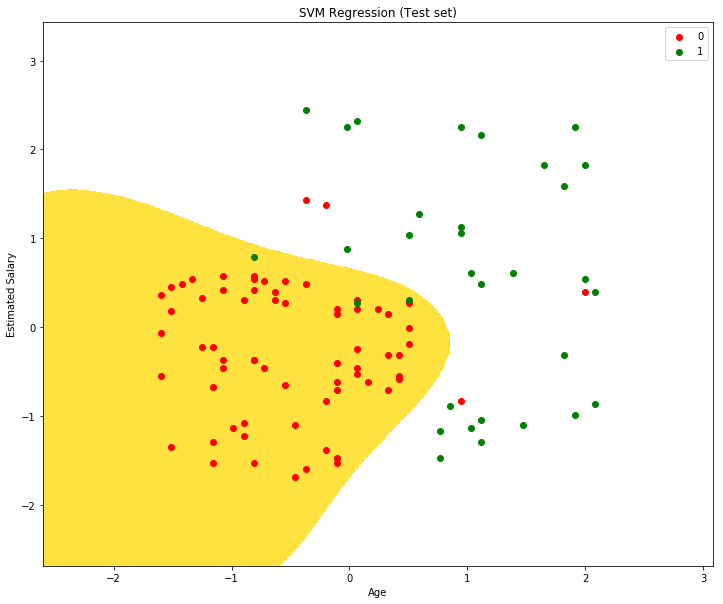

In [24]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_age_range = np.arange(start = X_test[:, 0].min() - 1,
                               stop = X_test[:, 0].max() + 1, step = 0.01)
x_salary_range = np.arange(start = X_test[:, 1].min() - 1,
                               stop = X_test[:, 1].max() + 1, step = 0.01)

X1, X2 = np.meshgrid(X_age_range,x_salary_range)

X_plot = np.array([X1.ravel(), X2.ravel()]).T

plt.contourf(X1, X2, classifier.predict(X_plot).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('gold', 'white')))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_train)):
    choose_rows = (Y_test == j)
    plt.scatter(X_test[choose_rows, 0], X_test[choose_rows, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [44]:
classifier.support_vectors_.__len__()

88

In [45]:
X_train.__len__()

300

In [46]:
classifier.support_

array([  0,  15,  17,  18,  22,  24,  34,  37,  43,  65,  81,  84,  95,
        96,  97,  98, 124, 138, 142, 153, 154, 155, 164, 178, 185, 187,
       199, 200, 205, 212, 214, 218, 221, 230, 239, 245, 252, 253, 260,
       262, 276, 283, 292, 299,  12,  13,  19,  23,  26,  33,  36,  39,
        46,  47,  48,  52,  63,  67,  68,  71,  82,  85,  92,  99, 102,
       106, 109, 123, 126, 130, 133, 135, 145, 152, 156, 170, 172, 173,
       197, 234, 242, 255, 261, 263, 264, 288, 289, 290], dtype=int32)

In [47]:
classifier.n_support_

array([44, 44], dtype=int32)